170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


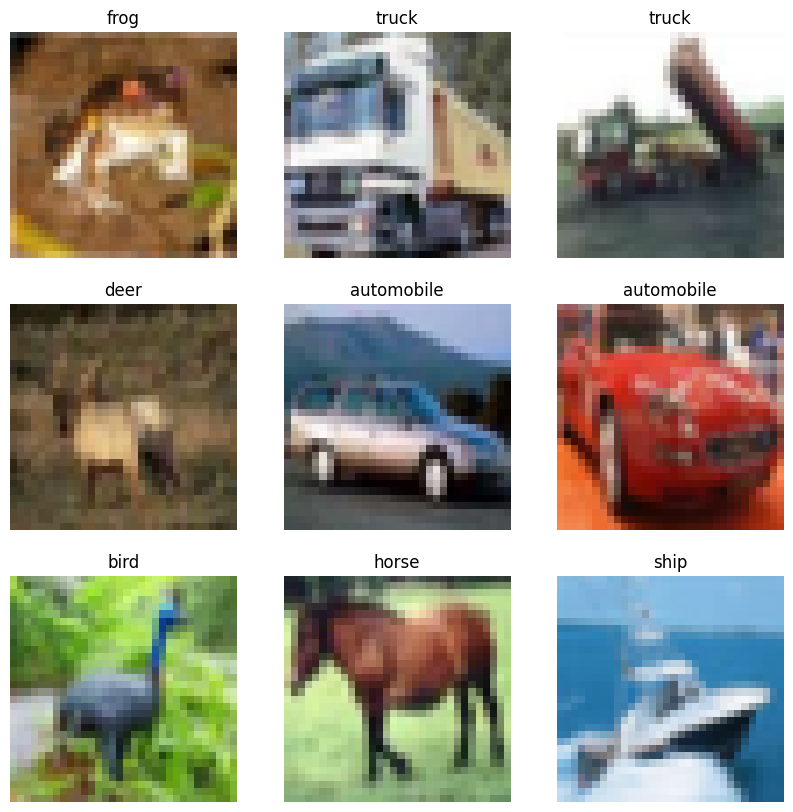

<ipython-input-1-1a440e4a8949>:30: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 63ms/step - accuracy: 0.2141 - loss: 2.1304 - val_accuracy: 0.2991 - val_loss: 1.9451
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 56ms/step - accuracy: 0.2634 - loss: 2.0108 - val_accuracy: 0.2967 - val_loss: 1.9312
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 59ms/step - accuracy: 0.2729 - loss: 1.9835 - val_accuracy: 0.3105 - val_loss: 1.9064
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.2743 - loss: 1.9824 - val_accuracy: 0.3103 - val_loss: 1.8960
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.2759 - loss: 1.9758 - val_accuracy: 0.3180 - val_loss: 1.8898
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 57ms/step - accuracy: 0.2805 - loss: 1.9760 - val_accuracy: 0.3291 - val_loss: 1.8787
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 0.2801 - loss: 1.9780 - val_accuracy: 0.3244 - val_loss: 1.8868
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.2782 - loss:

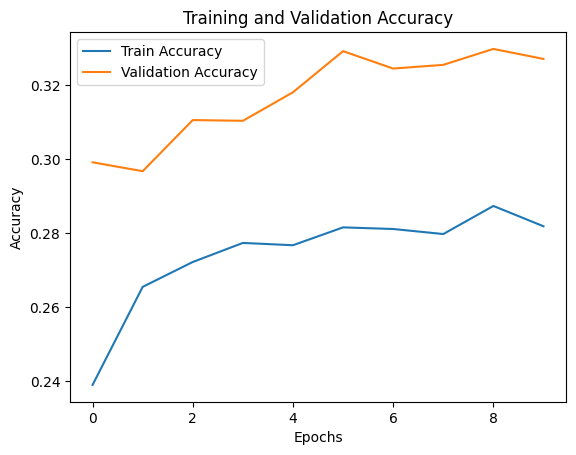

313/313 - 10s - 33ms/step - accuracy: 0.3270 - loss: 1.8712
Test Accuracy: 32.70%


In [ ]:
# Install TensorFlow if not already installed in Colab
!pip install tensorflow

# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset (60,000 32x32 color images in 10 classes)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize some images from the training set
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

# Build a model using a pre-trained MobileNetV2 (with weights trained on ImageNet)
base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),
                                               include_top=False,  # Remove the fully connected layer at the top
                                               weights='imagenet')

# Freeze the base model to avoid retraining
base_model.trainable = False

# Add a new classifier on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_datagen.fit(x_train)

# Train the model
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test))

# Plot the training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
